<table style="border-collapse: collapse; width: 100%;">
  <tr>
  <img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
    <td style="text-align: center; background-color: #FF69B4; padding: 20px;">
      <h1 style="font-size: 28px; color: #FFFFFF; margin: 0;">Estudio de Caso del Conjunto de Datos de Cáncer de Mama</h1>
      <p style="font-size: 18px; color: #FFFFFF; margin: 10px 0 0;">Regresión lineal</p>
    </td>
    <td style="background-color: #F2F2F2; padding: 20px;">
      <h3 style="font-size: 20px; color: #333333; margin: 0;">Elaborado por: </h3>
      <p style="font-size: 16px; color: #666666; margin: 10px 0 0;">Juan Masmela </p>
      <p style="font-size: 16px; color: #008000; margin: 0;">Universidad Central Maestría en Analítica de Datos</p>
      <p style="font-size: 16px; color: #666666; margin: 0;">"Fecha"</p>
    </td>
  </tr>
</table>


##El objetivo principal del conjunto es proporcionar datos relevantes para la investigación y el análisis en el campo del cáncer de mama

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 45.7 MB/s eta 0:00:00


In [ ]:
#importación de librerías para procesar datos
import pandas as pd
import numpy as np
import sweetviz as sw
#gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# generación del modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn import metrics
# métricas de evaluación y las matrices de confusión
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
# selección de características
from sklearn.feature_selection import RFE

# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#conexión con drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#llamado a la base de datos
ruta_cancer_mama = '/content/drive/MyDrive/analítica datos/caso final/datos/breast-cancer.csv'
cancer_mama  = pd.read_csv(ruta_cancer_mama)

<h3 style="font-size: 20px; color: #008000; margin: 0;">Origen de los datos</h3>
Los datos provienen de <a href="#" style="color: #FF0000;">https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset</a> , El cáncer de mama es el cáncer más común entre las mujeres en el mundo. Representa el 25% de todos los casos de cáncer y afectó a más de 2,1 millones de personas solo en 2015. [tomado de la fuente]

la base de datos es de libre acceso para clasificar los tumores en malignos (cancerosos) o benignos (no cancerosos) según los dato obtenidos.

In [ ]:
#ver si faltan datos
#print(cancer_mama.isnull().sum())
cancer_mama.shape

(569, 32)

In [ ]:
#nombres columnas
print(cancer_mama.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


<h3 style="font-size: 40px; color: #008000; margin: 0;">Clasificación de los datos</h3>

 los datos los podemos agrupar en 4 grupos que caracterizan datos de interés, morfología y valores fuera de lo normal

1. ***datos para la paciente***

'id': Identificador único para cada caso de cáncer de mama.

'diagnosis': Diagnóstico de la muestra, donde 'M' indica maligno (cáncer de mama) y 'B' indica benigno (no canceroso).

2. ***Características relacionadas con el radio y la forma de los tumores:***

'radius_mean': Media del radio de la célula.

'texture_mean': Media de los valores de textura.

'perimeter_mean': Media del perímetro del tumor.

'area_mean': Media del área del tumor.

'smoothness_mean': Media de la suavidad de la variación local de las longitudes de los radios.

'compactness_mean': Media de la medida de la compacidad del tumor.

'concavity_mean': Media de la medida de la concavidad del tumor.

'concave points_mean': Media del número de puntos de concavidad en el contorno del tumor.

'symmetry_mean': Media de la simetría del tumor.

'fractal_dimension_mean': Media de la dimensión fractal "coastline approximation" del tumor.

3. ***Características relacionadas con la variabilidad del radio:***

'radius_se': Error estándar del radio de la célula.

'texture_se': Error estándar de los valores de textura.

'perimeter_se': Error estándar del perímetro del tumor.


'area_se': Error estándar del área del tumor.

'smoothness_se': Error estándar de la suavidad de la variación local de las longitudes de los radios.

'compactness_se': Error estándar de la medida de la compacidad del tumor.

'concavity_se': Error estándar de la medida de la concavidad del tumor.

'concave points_se': Error estándar del número de puntos de concavidad en el contorno del tumor.

'symmetry_se': Error estándar de la simetría del tumor.

'fractal_dimension_se': Error estándar de la dimensión fractal "coastline approximation" del tumor.

4. ***Características relacionadas con los peores valores (promedio de los peores resultados de las células)***:

'radius_worst': Peor (mayor) valor del radio de la célula.

'texture_worst': Peor (mayor) valor de textura.

'perimeter_worst': Peor (mayor) valor del perímetro del tumor.

'area_worst': Peor (mayor) valor del área del tumor.

'smoothness_worst': Peor (mayor) valor de la suavidad de la variación local de las longitudes de los radios.

'compactness_worst': Peor (mayor) valor de la medida de la compacidad del tumor.

'concavity_worst': Peor (mayor) valor de la medida de la concavidad del tumor.

'concave points_worst': Peor (mayor) valor del número de puntos de concavidad en el contorno del tumor.

'symmetry_worst': Peor (mayor) valor de la simetría del tumor.

'fractal_dimension_worst': Peor (mayor) valor de la dimensión fractal
"coastline approximation" del tumor

In [ ]:
cancer_mama.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
cancer_mama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
cancer_mama.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Un valor a destacar en el conjunto de datos es la variable 'diagnosis', la cual juega un papel crucial en el análisis. Esta variable indica los diagnósticos proporcionados por profesionales de la salud, clasificando los quistes en dos categorías: malignos y benignos.

La variable 'diagnosis' brinda información fundamental para comprender la naturaleza de los quistes de mama presentes en el conjunto de datos. Los diagnósticos malignos indican la presencia de tumores cancerosos, mientras que los diagnósticos benignos señalan la ausencia de cáncer en los quistes.

Text(0.5, 1.0, 'Diagnosticos de Cancer')

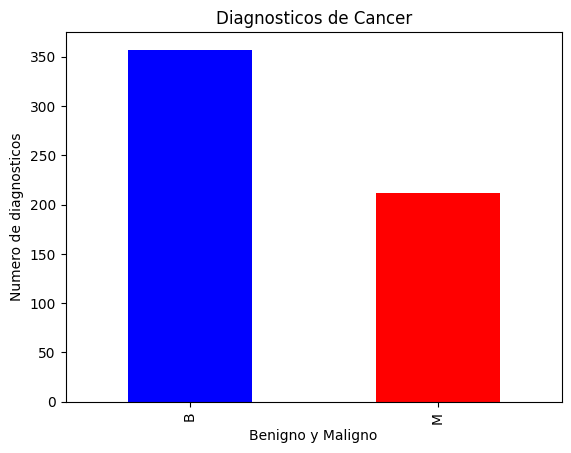

In [ ]:
cont_value=cancer_mama['diagnosis'].value_counts()
cont_value.plot(kind='bar',color=['blue', 'red'])

plt.xlabel('Benigno y Maligno')
plt.ylabel('Numero de diagnósticos')
plt.title('Diagnósticos de Cancer')

En el diagrama de barras identificamos los casos diagnosticados como maligno y benigno de la variable 'diagnosis', del conjunto de datos

In [ ]:
fig=px.histogram(cancer_mama, x= cancer_mama["area_mean"],color_discrete_sequence=['orange'])
fig.update_layout(
    title='Media del área del tumor',
    xaxis_title='Area del tumor',
    yaxis_title='Casos'
)

En el histograma podemos identificar las medidas del area de los tumores con respecto a los números de casos

In [ ]:
fig2=px.box(cancer_mama, x= cancer_mama["concave points_worst"],color_discrete_sequence=['purple'])
fig2.update_layout(
    title='Peores valores de concavidad en el contorno del tumor',
    xaxis_title='concavidad del tumor',

)

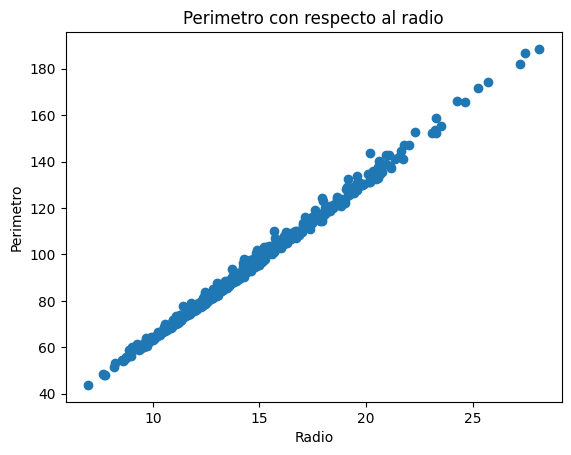

In [ ]:
plt.scatter(cancer_mama['radius_mean'], cancer_mama['perimeter_mean'])

# Agregar etiquetas y título
plt.xlabel('Radio')
plt.ylabel('Perímetro')
plt.title('Perímetro con respecto al radio')

# Mostrar el gráfico
plt.show()

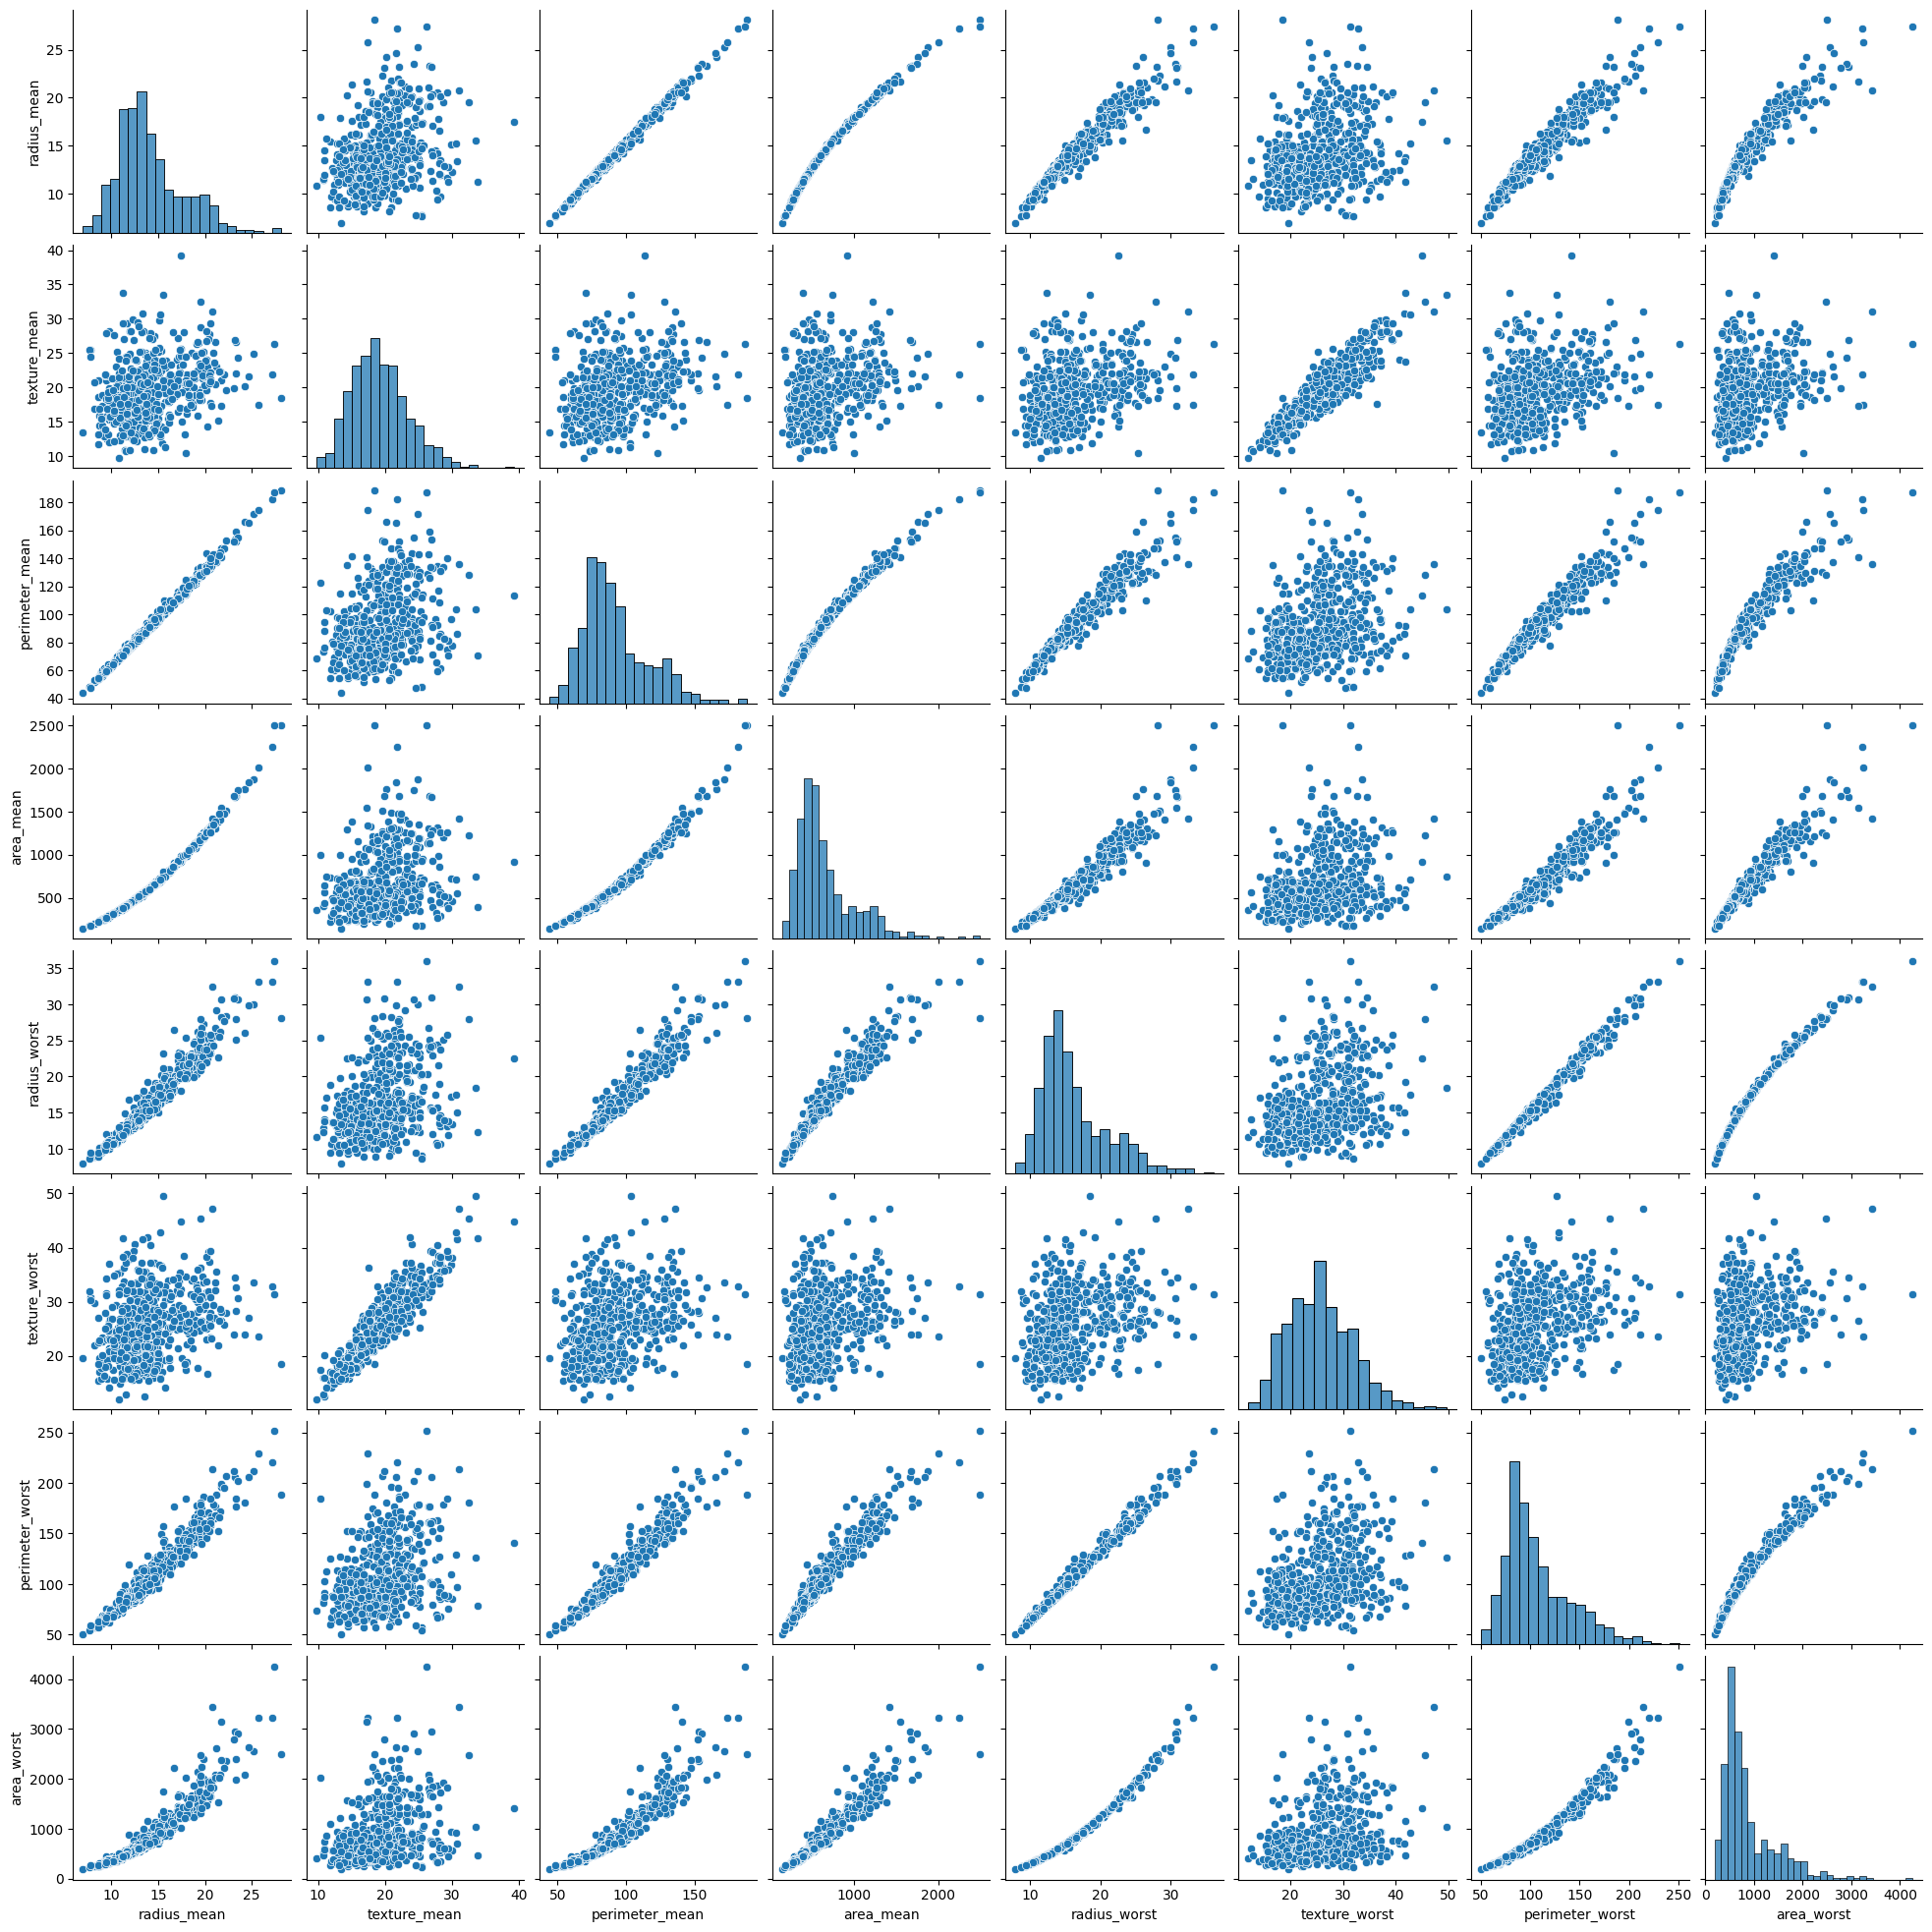

In [ ]:
#gráfico dispersion variables numéricas
sns.pairplot(cancer_mama[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst']])

In [ ]:
columnas_relevantes = [ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

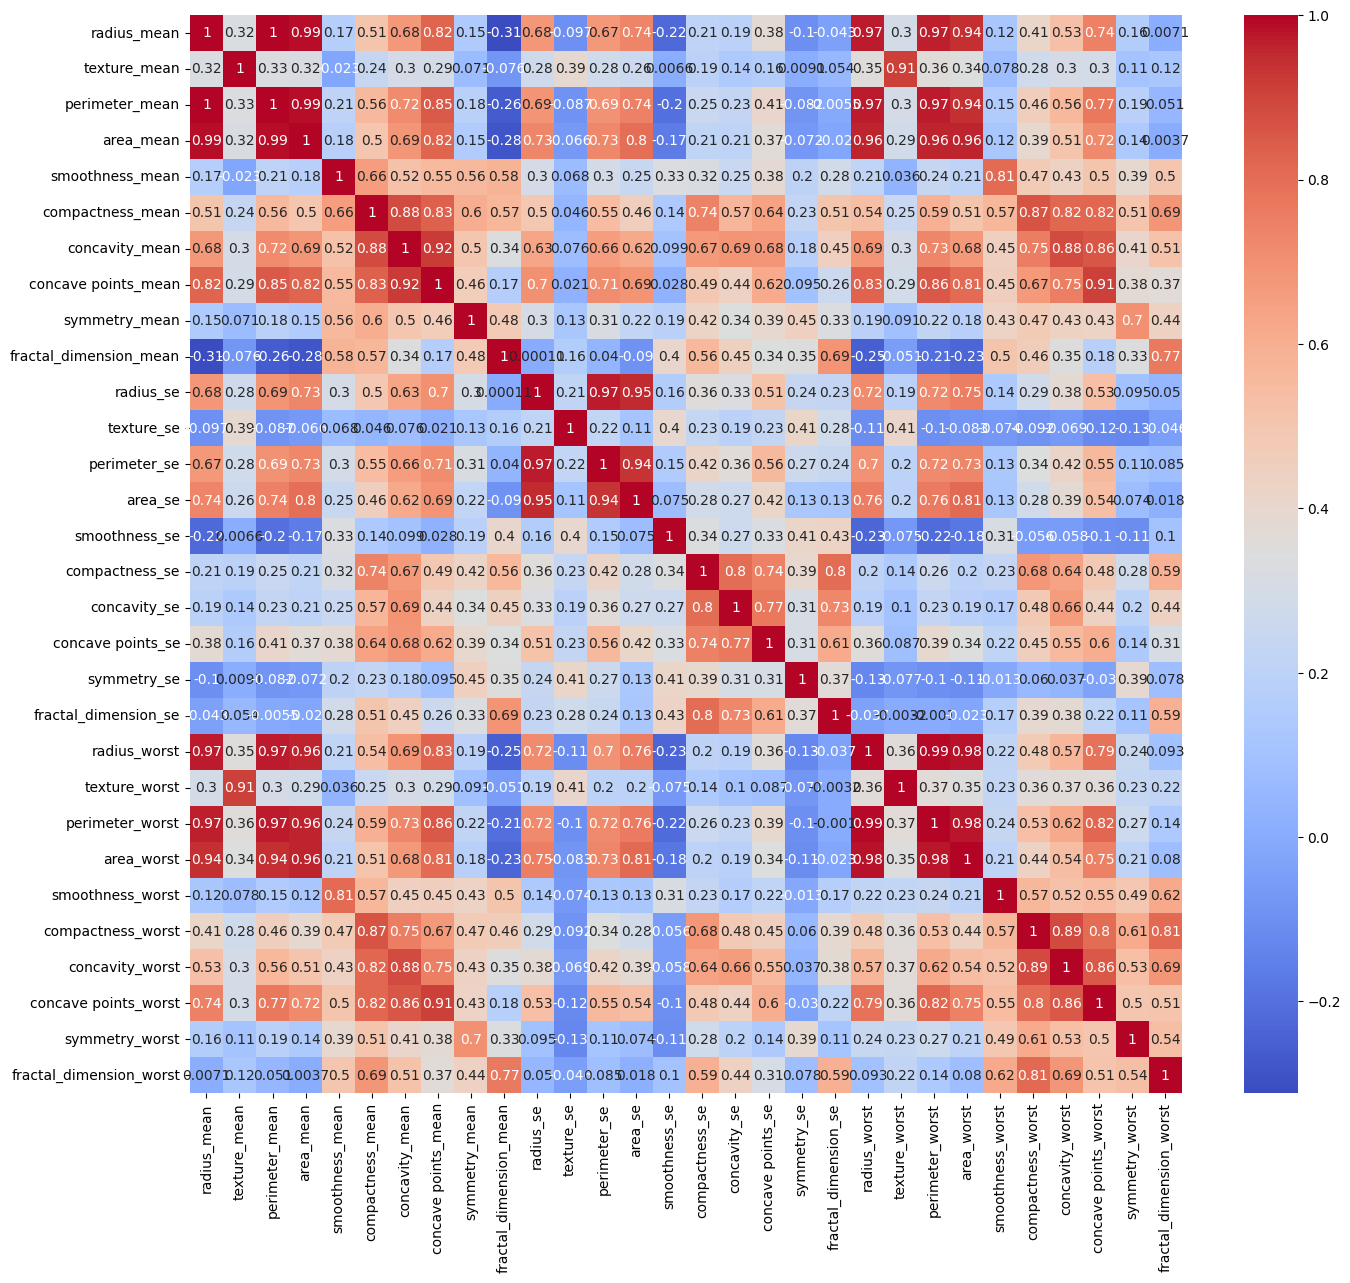

In [ ]:
data_subset = cancer_mama[columnas_relevantes]
# Obtener la matriz de correlación
correlation_matrix = data_subset.corr()

# Calcular la matriz de correlación para el subconjunto de datos
correlation_matrix = data_subset.corr()

# Visualizar la matriz de correlación
print(correlation_matrix)

#escalado de la matriz
plt.figure(figsize=(16, 14))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

## <FONT COLOR="blue"> PARTE 2: PYTHON-CLASIFICACIÓN </FONT>
##Las variables objetivo son 'diagnosis' correspondiendo al diagnostico y 'compactness_mean' correspondiendo a la Media de la medida de la compacidad del tumor con respecto a varias variables de las cuales posee relación lineal mayor o igual a 50%.

In [ ]:
#quitar variable id

remplazo de la variable "diagnosis" a un valor booleano

In [ ]:
cancer_mama["diagnosis"]=cancer_mama["diagnosis"].replace({"M":1,"B":0})

In [ ]:
# Seleccionamos la variable objetivo (binaria)
y=cancer_mama["diagnosis"]
# Seleccionamos las variables explicativas
X=data_subset

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test=train_test_split(X,                      # variables predictoras
                                                  y,                      # variable objetivo
                                                  random_state=44,       # random para fijar semilla
                                                  test_size=0.2,          # tamaño del conjunto de test
                                                  stratify=y)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0    285
1    170
Name: diagnosis, dtype: int64
0    72
1    42
Name: diagnosis, dtype: int64


In [ ]:
# Llamo la regresión logística
logic_reg = LogisticRegression()

# Entreno el modelo
logic_reg.fit(X_train, y_train) ## Entreno el modelo

LogisticRegression()

In [ ]:
y_pred = logic_reg.predict(X_test)

Revisemos los coeficientes $\beta_i$ del modelo

In [ ]:
logic_reg.coef_

array([[-0.97670864, -0.48159052, -0.25275225,  0.0142841 ,  0.04104272,
         0.17527881,  0.24785493,  0.11138445,  0.04536757,  0.01061832,
        -0.05162655, -0.41440645, -0.24740752,  0.10228757,  0.00371776,
         0.02969112,  0.04663516,  0.01352412,  0.00797515,  0.00250279,
        -1.05770785,  0.49020766,  0.26922384,  0.01275754,  0.07604363,
         0.51898403,  0.68517893,  0.21341594,  0.13649161,  0.04999678]])

El siguiente es el intercepto, es decir $\beta_0$.

In [ ]:
logic_reg.intercept_

array([-0.18490997])

predicciones


In [ ]:
y_pred_test = logic_reg.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0])

matriz de confusion


Text(0.5, 23.52222222222222, 'Predicciones')

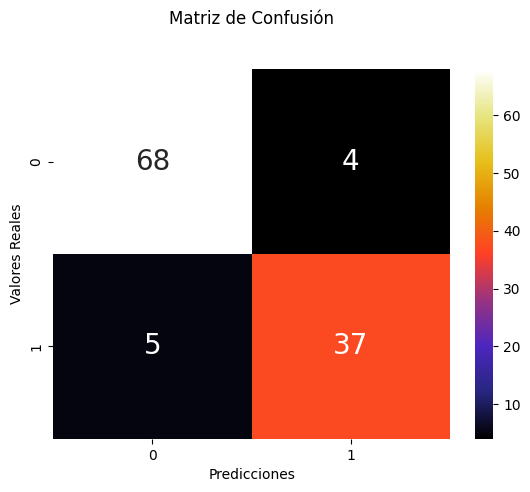

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix
cm = CM(y_test, y_pred_test)
cm
sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="CMRmap",                       # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        72
           1       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



## <FONT COLOR="green"> PARTE 3 : PYTHON-REGRESIÓN </FONT>

para esta seccion se elaborara una regrecion lineal multiple de la variable 'compactness_mean' con respecto a las demas variables cuantittativas.

seleccion de variables

In [ ]:
X = cancer_mama[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]  # variables independientes
y = cancer_mama['compactness_mean']  # Variable objetivo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(rmse)
print(r2)

7.275330376504616e-05
0.9751042448361628


In [ ]:
r2_score = metrics.r2_score(y_test, y_pred)
print("Coeficiente de determinación R2:", r2_score)
print("Error absoluto medio (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Raíz del error cuadrático medio (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coeficiente de determinación R2: 0.9751042448361628
Error absoluto medio (MAE): 0.006703513416514113
Error cuadrático medio (MSE): 7.275330376504616e-05
Raíz del error cuadrático medio (RMSE): 0.008529554722554171


In [ ]:
# Itera sobre las columnas para inicializar las variables de prueba
for columna in cancer_mama.columns:
    # Calcula los valores del percentile 25% y 75% para tener valores en el rango
    percentil_25 = cancer_mama[columna].quantile(0.25)
    percentil_75 = cancer_mama[columna].quantile(0.75)

    # Obtiene el valor más pequeño del percentile 25%
    valor_minimo = cancer_mama[cancer_mama[columna] >= percentil_25][columna].min()

    # Obtiene el valor más grande del percentil 75%
    valor_maximo = cancer_mama[cancer_mama[columna] <= percentil_75][columna].max()

    # Imprime los resultados
    print(f"'{columna}': [np.random.uniform({valor_minimo},{valor_maximo})],")
                                                #25%             %75
    #importante quitar las variables que no se usaron, la dependiente y la , al final

'id': [np.random.uniform(869218,8813129)],
'diagnosis': [np.random.uniform(0,1)],
'radius_mean': [np.random.uniform(11.7,15.78)],
'texture_mean': [np.random.uniform(16.17,21.8)],
'perimeter_mean': [np.random.uniform(75.17,104.1)],
'area_mean': [np.random.uniform(420.3,782.7)],
'smoothness_mean': [np.random.uniform(0.08637,0.1053)],
'compactness_mean': [np.random.uniform(0.06492,0.1304)],
'concavity_mean': [np.random.uniform(0.02956,0.1307)],
'concave points_mean': [np.random.uniform(0.02031,0.074)],
'symmetry_mean': [np.random.uniform(0.1619,0.1957)],
'fractal_dimension_mean': [np.random.uniform(0.0577,0.06612)],
'radius_se': [np.random.uniform(0.2324,0.4789)],
'texture_se': [np.random.uniform(0.8339,1.474)],
'perimeter_se': [np.random.uniform(1.606,3.357)],
'area_se': [np.random.uniform(17.85,45.19)],
'smoothness_se': [np.random.uniform(0.005169,0.008146)],
'compactness_se': [np.random.uniform(0.01308,0.03245)],
'concavity_se': [np.random.uniform(0.01509,0.04205)],
'concave points_se'

In [ ]:
#conjunto de características de prueba llamado X_new
X_new = pd.DataFrame({
    'radius_mean': [np.random.uniform(11.7, 15.78)],
    'texture_mean': [np.random.uniform(16.17, 21.8)],
    'perimeter_mean': [np.random.uniform(75.17, 104.1)],
    'area_mean': [np.random.uniform(420.3, 782.7)],
    'smoothness_mean': [np.random.uniform(0.08637, 0.1053)],
    'concavity_mean': [np.random.uniform(0.02956, 0.1307)],
    'concave points_mean': [np.random.uniform(0.02031, 0.074)],
    'symmetry_mean': [np.random.uniform(0.1619, 0.1957)],
    'fractal_dimension_mean': [np.random.uniform(0.0577, 0.06612)],
    'radius_se': [np.random.uniform(0.2324, 0.4789)],
    'texture_se': [np.random.uniform(0.8339, 1.474)],
    'perimeter_se': [np.random.uniform(1.606, 3.357)],
    'area_se': [np.random.uniform(17.85, 45.19)],
    'smoothness_se': [np.random.uniform(0.005169, 0.008146)],
    'compactness_se': [np.random.uniform(0.01308, 0.03245)],
    'concavity_se': [np.random.uniform(0.01509, 0.04205)],
    'concave points_se': [np.random.uniform(0.007638, 0.01471)],
    'symmetry_se': [np.random.uniform(0.01516, 0.02348)],
    'fractal_dimension_se': [np.random.uniform(0.002248, 0.004558)],
    'radius_worst': [np.random.uniform(13.01, 18.79)],
    'texture_worst': [np.random.uniform(21.08, 29.72)],
    'perimeter_worst': [np.random.uniform(84.11, 125.4)],
    'area_worst': [np.random.uniform(515.3, 1084.0)],
    'smoothness_worst': [np.random.uniform(0.1166, 0.146)],
    'compactness_worst': [np.random.uniform(0.1472, 0.3391)],
    'concavity_worst': [np.random.uniform(0.1145, 0.3829)],
    'concave points_worst': [np.random.uniform(0.06493, 0.1614)],
    'symmetry_worst': [np.random.uniform(0.2504, 0.3179)],
    'fractal_dimension_worst': [np.random.uniform(0.07146, 0.09208)]
})
X_new

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.428179,19.5675,82.183673,434.13236,0.105046,0.110723,0.045299,0.170175,0.065957,0.237319,...,15.191972,23.287376,125.186794,778.4231,0.137788,0.197624,0.126937,0.140193,0.257725,0.074407


In [ ]:
# Realiza la predicción utilizando el modelo entrenado
# recordar que la variable dependiente es 'compactness_mean'
y_pred_new = regression.predict(X_new)

# Imprime las predicciones
print("Predicciones:", y_pred_new)

Predicciones: [0.10488696]


conclusiones

la regresión lineal multiple tomando como base los valor de R^2 y MSE es lo suficientemente apropiada para determinar el 'compactness_mean' (Media de la medida de la compacidad del tumor) teniendo como referencia las demás variables, sugiriendo que el modelo es bastante bueno para predecir 'compactness_mean' utilizando las variables proporcionadas.
el MAE es bastante bajo, lo que sugiere que el modelo tiene un buen rendimiento en términos de precisión de las predicciones.
Un MSE más bajo indica un mejor rendimiento del modelo, en este caso también es bastante bajo, lo que sugiere que el modelo es preciso.